In [30]:
# Матрица в грей скейл изображение
# Одномерное ядро
# Прогоняем ядро по строкам как обычно
# Получили построчную свёртку
# Прогоняем транспонированным ядром по столбцам этой свёртки
# Получили новую свёртку.

In [83]:
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


def convolution(sig, kernel):
    result_of_convolution = []
    appended_signal = []
    ammount_to_append =len(kernel) - 1
    for i in range(ammount_to_append):
        appended_signal.append(0)
    for i in range(len(sig)):
        appended_signal.append(sig[i])
    for i in range(ammount_to_append):
        appended_signal.append(0)
    
    for i in range(len(appended_signal)-ammount_to_append):
        curr = 0
    
        for k in range(len(kernel)):
            curr += appended_signal[i+k] * kernel[k]
        result_of_convolution.append(curr)
    return result_of_convolution

def add_kernel(im, ker):
    im = im.convert("L")
    matrix = np.asarray(im)
    matrix_list = matrix.tolist()
    result_image = []
    for i in range(len(matrix_list)):
        result_image.append(convolution(matrix_list[i], ker))
    result_image = np.array(result_image).T.tolist()
    result_image_1 = []
    for i in range(len(result_image)):
        result_image_1.append(convolution(result_image[i], ker))
    result = np.array(result_image_1).T
    new_im = Image.fromarray(result)
    return new_im
    
def add_kernel_2(im, ker1, ker2):
    im = im.convert("L")
    matrix = np.asarray(im)
    matrix_list = matrix.tolist()
    result_image = []
    for i in range(len(matrix_list)):
        result_image.append(convolution(matrix_list[i], ker1))
    result_image = np.array(result_image).T.tolist()
    result_image_1 = []
    for i in range(len(result_image)):
        result_image_1.append(convolution(result_image[i], ker2))
    result = np.array(result_image_1).T
    
    plt.imshow(result, cmap="gray")
    plt.show()
    

In [84]:
im = Image.open("testimage.jpg")
#im = Image.open("Unicorn.jpg")

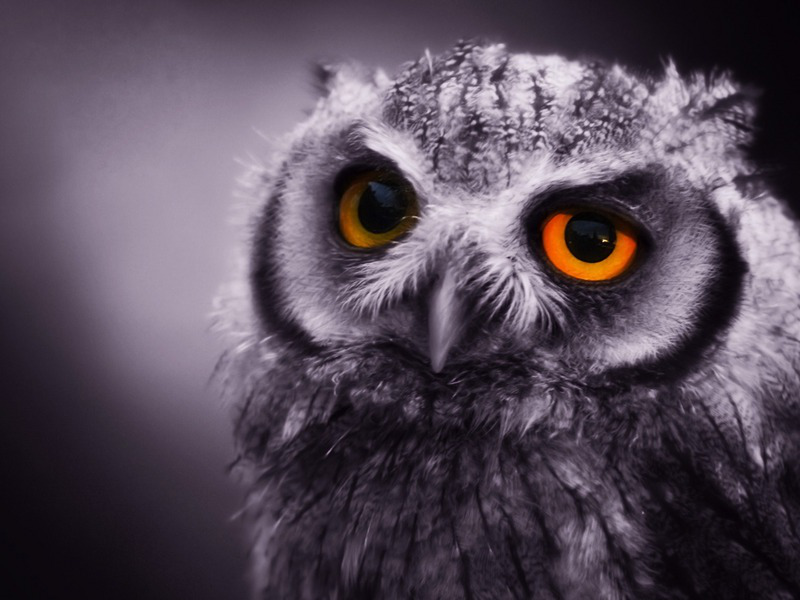

In [85]:
im

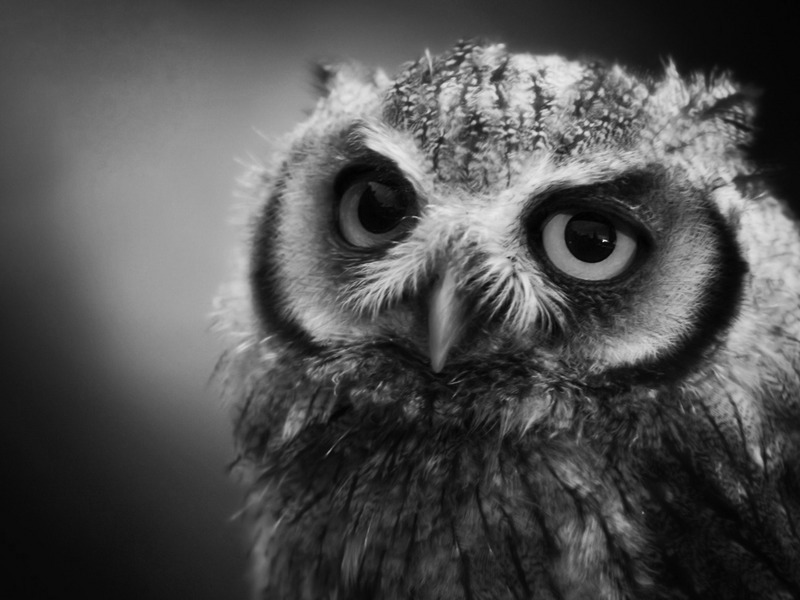

In [86]:
im.convert('L')

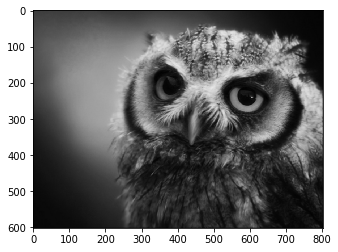

In [87]:
%matplotlib inline
ker = [1/4, 1/2, 1/4]
imshow(add_kernel(im, ker))

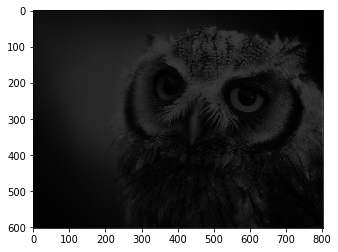

In [88]:
%matplotlib inline
ker = [1/4, 1/2, -1/4]
imshow(add_kernel(im, ker))

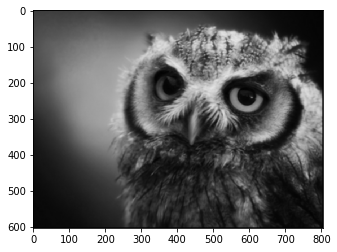

In [89]:
%matplotlib inline
ker = [0.136, 0.228, 0.272, 0.228, 0.136]
imshow(add_kernel(im, ker))

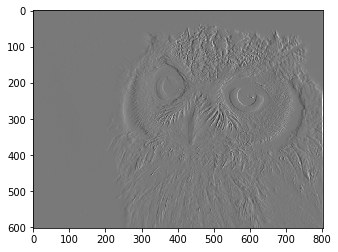

In [90]:
%matplotlib inline
ker1 = [1, 0, -1]
ker2 = [1, 2, 1]
add_kernel_2(im, ker1, ker2)

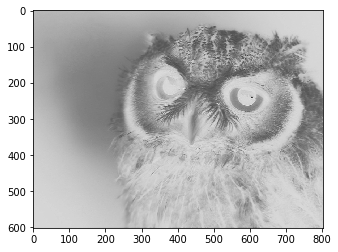

In [91]:
%matplotlib inline
ker1 = [0, 1, 0]
ker2 = [1, -4, 1]
add_kernel_2(im, ker1, ker2)

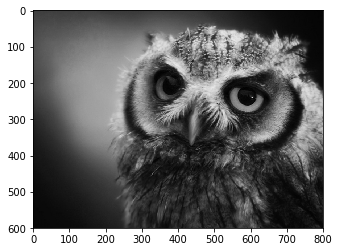

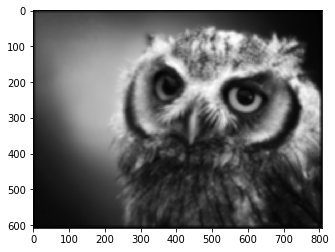

In [95]:
%matplotlib inline
ker1 = [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]
ker2 = [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]
im = im.convert("L")
plt.imshow(im, cmap="gray")
plt.show()
add_kernel_2(im, ker1, ker2)